In [2]:
%matplotlib inline


# Span Selector


The SpanSelector is a mouse widget to select a xmin/xmax range and plot the
detail view of the selected region in the lower axes



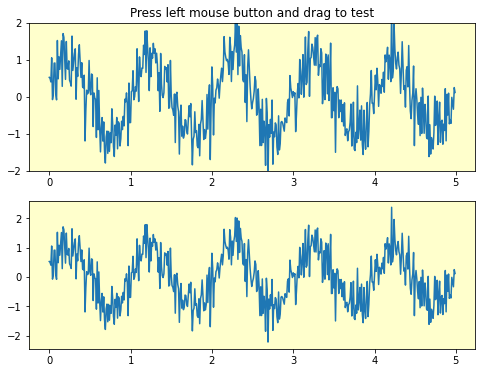

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))
ax1.set(facecolor='#FFFFCC')

x = np.arange(0.0, 5.0, 0.01)
y = np.sin(2*np.pi*x) + 0.5*np.random.randn(len(x))

ax1.plot(x, y, '-')
ax1.set_ylim(-2, 2)
ax1.set_title('Press left mouse button and drag to test')

ax2.set(facecolor='#FFFFCC')
line2, = ax2.plot(x, y, '-')


def onselect(xmin, xmax):
    indmin, indmax = np.searchsorted(x, (xmin, xmax))
    indmax = min(len(x) - 1, indmax)

    thisx = x[indmin:indmax]
    thisy = y[indmin:indmax]
    line2.set_data(thisx, thisy)
    ax2.set_xlim(thisx[0], thisx[-1])
    ax2.set_ylim(thisy.min(), thisy.max())
    fig.canvas.draw()

<div class="alert alert-info"><h4>Note</h4><p>If the SpanSelector object is garbage collected you will lose the
   interactivity.  You must keep a hard reference to it to prevent this.</p></div>




In [4]:
span = SpanSelector(ax1, onselect, 'horizontal', useblit=True,
                    rectprops=dict(alpha=0.5, facecolor='red'))
# Set useblit=True on most backends for enhanced performance.


plt.show()